# **DEPENDENCIES**

In [19]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from optihive import pso as ohp
from optihive import utils as ohu
from optihive import benchmarks as ohb
from optihive import objectives as oho

# **PARTICLE SWARM OPTIMIZATION**

## **VanillaSwarm**

**Objective Function**

In [20]:
# Objectivefunction will be given a dictionary of parameters, with the keys
# being the parameter names and the values being the parameter values. 'f' here
# is a dummy that directly acts on x and y
f = lambda x, y: (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

# 'of' however acts on the expected dictionary by unpacking it.
of = lambda kwargs: f(**kwargs)
print(f"of(1, 2) = {of({'x': 1, 'y': 2})}")

of(1, 2) = 4.130187303206262


**Objective Function Contour**

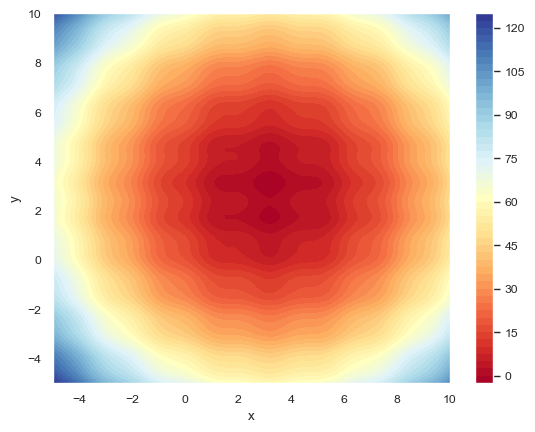

In [21]:
# This is a plot of the objective function on regular grid data, the plot 
# methods in trackers will usually work on irregular data logged while updating
# the swarm particles' location and the local scores using some form of
# interpolation backend, they are meant to only give a brief idea of the loss
# space
def plot_of_contour(of, x_range, y_range, levs=100, xlabel="x", ylabel="y"):
    x = np.linspace(*x_range, levs)
    y = np.linspace(*y_range, levs)
    X, Y = np.meshgrid(x, y)
    Z = of({'x': X, 'y': Y})
    cf = plt.contourf(X, Y, Z, 50, cmap='RdYlBu')
    plt.colorbar(cf)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_of_contour(of, (-5, 10), (-5, 10))

**Parameter Initialization**

In [22]:
# Defining the search space, the keys are the parameter names and the values
# are tuples of the form (type, domain), where type is either 'con' for 
# continuous 'cat' for categorical, 'dis' for discrete of any type or 'dis_int'
# for discrete of integer type.
search_space_con = {
    "x": ("con", [-5, 10]),
    "y": ("con", [-5, 10])
}

# discrete search space for the same objective function, while internally, the
# space is continuous, the objective function is being evaluated at the closest
# discrete point to the current particle location in the domain.
search_space_dis = {
    "x": ("dis", list(range(-5, 10))),
    "y": ("dis", list(range(-5, 10)))
}

n_particles = 100

sot_con = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

sot_dis = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

**Swarm Initialization**

In [23]:
swarm_con = ohp.VanillaSwarm(
    search_space=search_space_con,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_con],
)

swarm_dis = ohp.VanillaSwarm(
    search_space=search_space_dis,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_dis],
)

print(">> Initial Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

swarm_con.run(200)
swarm_dis.run(200)

print(">> Final Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

>> Initial Values
swarm_con | G: [[2.6107268 1.9309621]], Gs: 0.7989785647043046
swarm_dis | G: [[3. 2.]], Gs: -0.3085797523180111
>> Final Values
swarm_con | G: [[3.1851552 3.1298032]], Gs: -1.8083520359211966
swarm_dis | G: [[2.7999992 2.6000006]], Gs: -1.483513295303561


As it can be seen, the swarm with continuous domain in the same range as the
swarm with discrete domain, performs better. This is because the objective
function is being calculated at the current points, while in discrete domain, 
the objective function is calculated at the nearest point to the current point.


**Visualization**

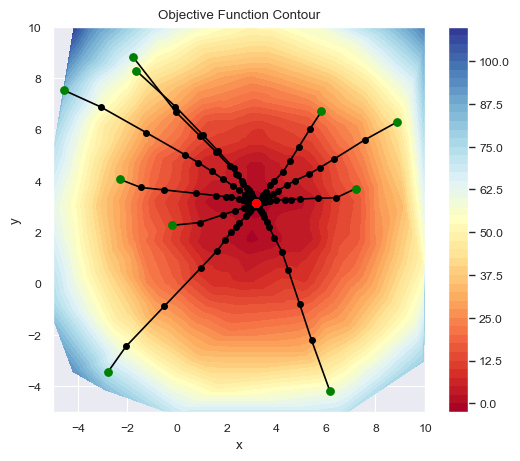

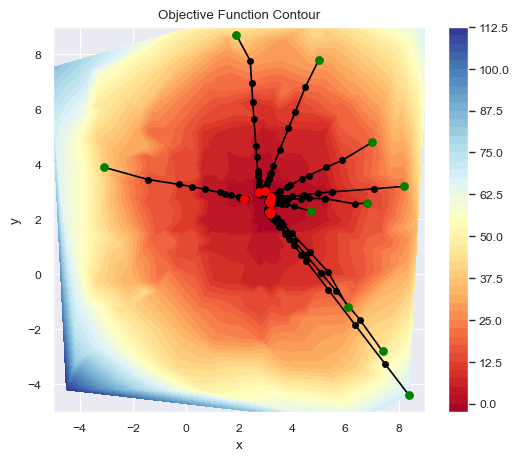

In [24]:
# Visualizing the loss space via the swarm objective trackers draw_lazy method.
# The contours made are approximated from the logged positional data of the
# swarm particles, the particle_indices argument is used to select a subset of
# particles to be plotted.
sot_con.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])
sot_dis.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])

It can be seen that discrete domain's loss interpolation is not as good as that of continuous. This is because of the reason previously mentioned, loss is calculated at the nearest valid point in the domain, not the internal continuous domain.

**Gradient Assist**

>> Initial Values
swarm_con | G: [[2.6877472 1.512163 ]], Gs: 0.6914759689257475
swarm_dis | G: [[4. 3.]], Gs: 0.816942222151282
>> Final Values
swarm_con | G: [[3.1851556 3.1298037]], Gs: -1.808352035916161
swarm_dis | G: [[2.551122  3.3391967]], Gs: -1.483513295303561


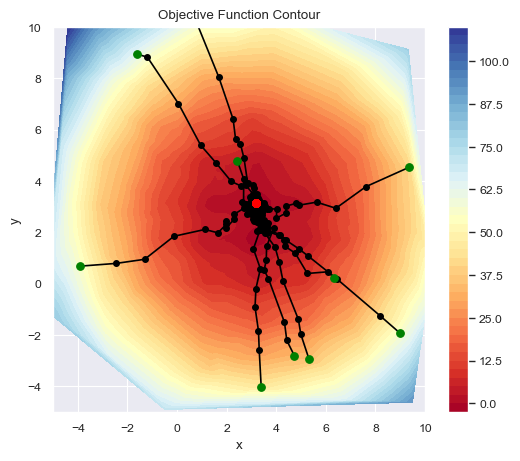

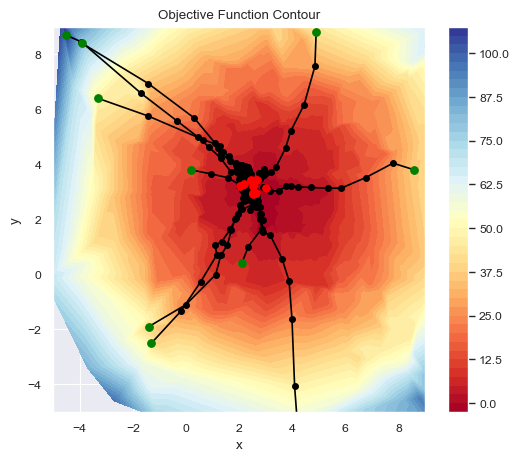

In [25]:
search_space_con = {
    "x": ("con", [-5, 10]),
    "y": ("con", [-5, 10])
}

search_space_dis = {
    "x": ("dis", list(range(-5, 10))),
    "y": ("dis", list(range(-5, 10)))
}

n_particles = 100

sot_con = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

sot_dis = ohp.SwarmObjectiveTracker(
    track_params=["x", "y"],
    eager=False,
    lazy_step=4,
)

swarm_con = ohp.VanillaSwarm(
    search_space=search_space_con,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_con],
    use_gradient=True,
    r3=0.4,
    gw=0.3,
)

swarm_dis = ohp.VanillaSwarm(
    search_space=search_space_dis,
    n_particles=n_particles,
    objective_function=of,
    trackers=[sot_dis],
    use_gradient=True,
    r3=0.4,
    gw=0.3,
)

print(">> Initial Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

swarm_con.run(200)
swarm_dis.run(200)

print(">> Final Values")
print(f"swarm_con | G: {swarm_con.G}, Gs: {swarm_con.Gs}")
print(f"swarm_dis | G: {swarm_dis.G}, Gs: {swarm_dis.Gs}")

sot_con.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])
sot_dis.draw_lazy(particle_indices=[p for p in range(0, n_particles, 10)])

As it can be seen, gradient assist helps increase the performance in terms of loss space construction, the confirmity of final positions and the apparent increase in cognitive effects.

**Random Forest Classifier hyperparameter tuning**

In [26]:
from sklearn.datasets import load_iris

In [28]:
search_space_rfc = {
    "n_estimators": ("dis_int", list(range(1, 50))),
    "max_depth": ("dis_int", list(range(1, 15))),
    "min_samples_split": ("dis_int", list(range(2, 15))),
    "min_samples_leaf": ("dis_int", list(range(1, 15))),
    "max_features": ("cat", ["sqrt", "log2"]),
    "criterion": ("cat", ["gini", "entropy"]),
    "min_weight_fraction_leaf": ("con", [0.0, 0.5]),
}
n_particles = 50

X, Y = load_iris(return_X_y=True)
rfcof = oho.RandomForestClassifierObjective(X, Y)

sot_rfc = ohp.SwarmObjectiveTracker(
    track_params=["n_estimators", "min_weight_fraction_leaf"],
    eager=False,
    lazy_step=4,
)
pbt_rfc = ohu.ProgressBarTracker()

In [32]:
swarm_rfc = ohp.VanillaSwarm(
    search_space=search_space_rfc,
    n_particles=n_particles,
    objective_function=rfcof,
    trackers=[sot_rfc, pbt_rfc],
)

print(">> Initial Values")
Gi = swarm_rfc.x_to_dict(swarm_rfc.X_parse(swarm_rfc.G)[0])
print(f"swarm_rfc | G: {Gi}, Gs: {swarm_rfc.Gs}")

swarm_rfc.run(100)

>> Initial Values
swarm_rfc | G: {'n_estimators': 14, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'gini', 'min_weight_fraction_leaf': 0.25504112243652344}, Gs: 0.0


110it [03:18,  1.31s/it]                       

In [33]:
print(">> Final Values")
Gf = swarm_rfc.x_to_dict(swarm_rfc.X_parse(swarm_rfc.G)[0])
print(f"swarm_rfc | G: {Gf}, Gs: {swarm_rfc.Gs}")

>> Final Values
swarm_rfc | G: {'n_estimators': 14, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'gini', 'min_weight_fraction_leaf': 0.3004705607891083}, Gs: 0.0


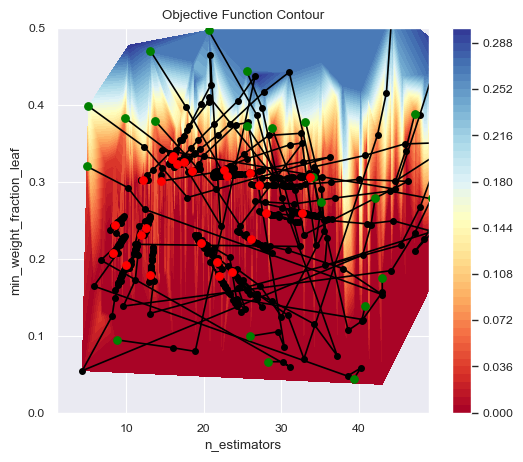

In [34]:
sot_rfc.draw_lazy(particle_indices=[p for p in range(0, n_particles, 2)])

**Benchmark Objectives**

Rastrigin Objective

True loss Contour


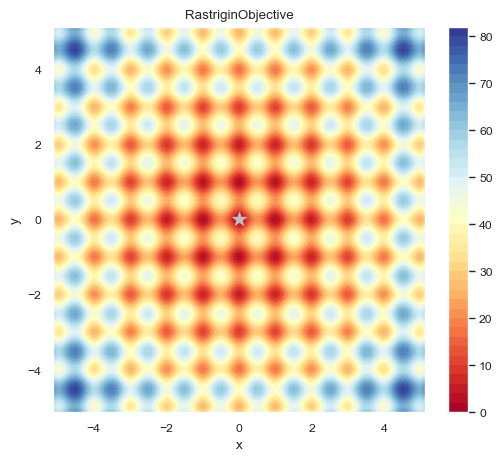

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-1.049163   1.0592554]], Gs: 3.381193246550083
>> Final Values
swarm_ras | G: [[-0.00138233 -0.00284631]], Gs: 0.0019863238677473305
rasof | G, Gs: ((0, 0, 0),)


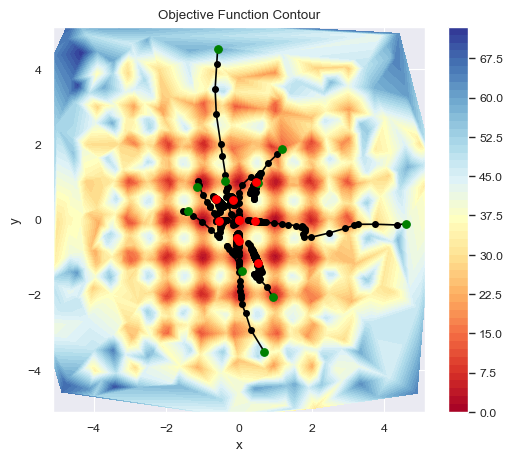

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[-0.06810862 -0.05067423]], Gs: 1.4115880426843432
>> Final Values
swarm_ras | G: [[ 0.00012326 -0.00064979]], Gs: 8.678093234948392e-05
rasof | G, Gs: ((0, 0, 0),)


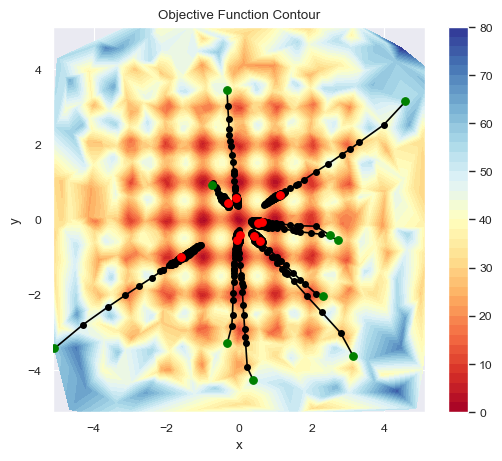

In [32]:
rasof = ohb.RastriginObjective()

ss2d_rasof = {
    "x": ("con", rasof.bounds_2d[: 2]),
    "y": ("con", rasof.bounds_2d[2:]),	
}

print("True loss Contour")
rasof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_rasof,
        n_particles=200,
        objective_function=rasof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"rasof | G, Gs: {rasof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Ackley Objective

True loss Contour


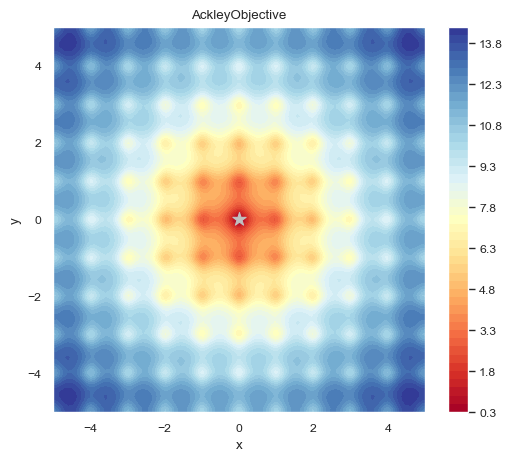

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[0.9983861  0.00580196]], Gs: 2.6345819219786866
>> Final Values
swarm_ras | G: [[-3.4834942e-16 -9.5921637e-17]], Gs: 4.440892098500626e-16
ackof | G, Gs: ((0, 0, 0),)


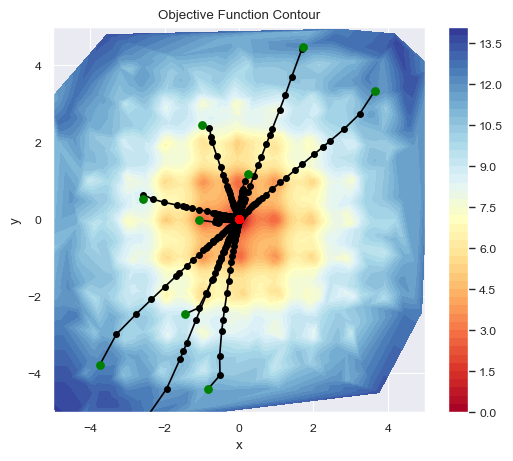

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[0.08588011 1.0135818 ]], Gs: 2.870763535660171
>> Final Values
swarm_ras | G: [[-2.2645717e-18  3.1385138e-16]], Gs: 4.440892098500626e-16
ackof | G, Gs: ((0, 0, 0),)


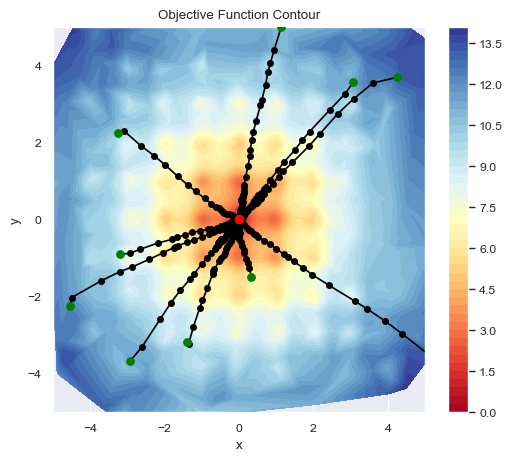

In [33]:
ackof = ohb.AckleyObjective()

ss2d_ackof = {
    "x": ("con", ackof.bounds_2d[: 2]),
    "y": ("con", ackof.bounds_2d[2:]),	
}

print("True loss Contour")
ackof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_ackof,
        n_particles=200,
        objective_function=ackof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"ackof | G, Gs: {ackof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Rosenbrock Objective

True loss Contour


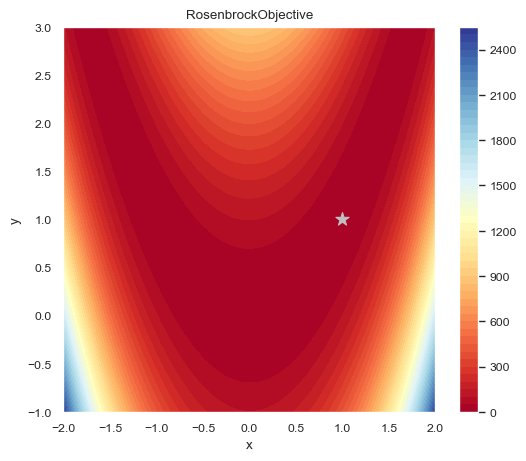

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-327.4478   406.07935]], Gs: 1140965726080.1743
>> Final Values
swarm_ras | G: [[1.0003254 1.0006496]], Gs: 1.0611292873398443e-07
rosof | G, Gs: ((1, 1, 0),)


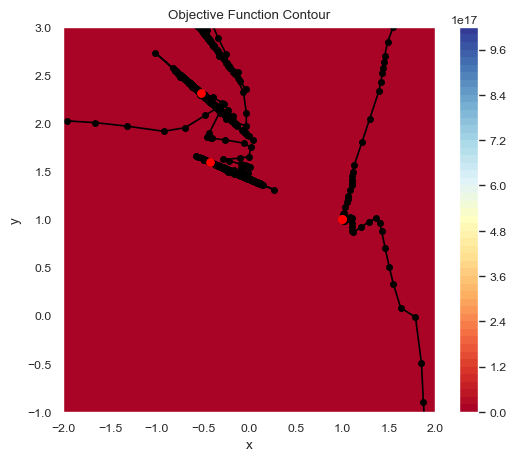

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[ 123.68545 8167.0493 ]], Gs: 5085189133.445925
>> Final Values
swarm_ras | G: [[ -55.98991 3134.8752 ]], Gs: 3247.852231893211
rosof | G, Gs: ((1, 1, 0),)


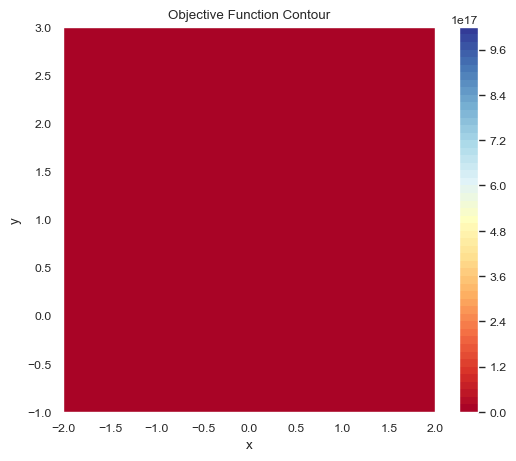

In [5]:
rosof = ohb.RosenbrockObjective()

ss2d_rosof = {
    "x": ("con", rosof.bounds_2d[: 2]),
    "y": ("con", rosof.bounds_2d[2:]),	
}

print("True loss Contour")
rosof.plot2d(bounds_2d=(-2, 2, -1, 3))
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_rosof,
        n_particles=100,
        objective_function=rosof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(1000)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"rosof | G, Gs: {rosof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
        xlim=(-2, 2),
        ylim=(-1, 3),
    )

Beale Objective

True loss Contour


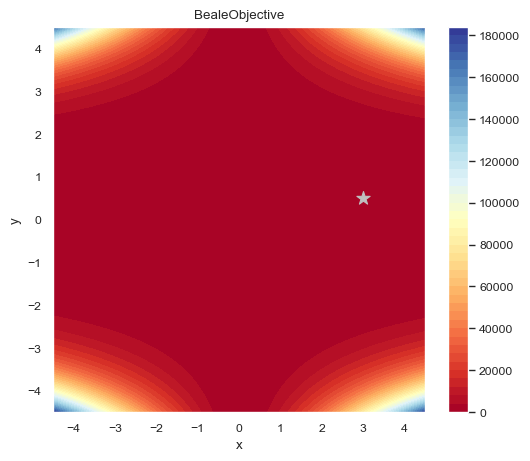

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[ 1.7588497  -0.13850397]], Gs: 1.2701165994614896
>> Final Values
swarm_ras | G: [[3.  0.5]], Gs: 0.0
beaof | G, Gs: ((3, 0.5, 0),)


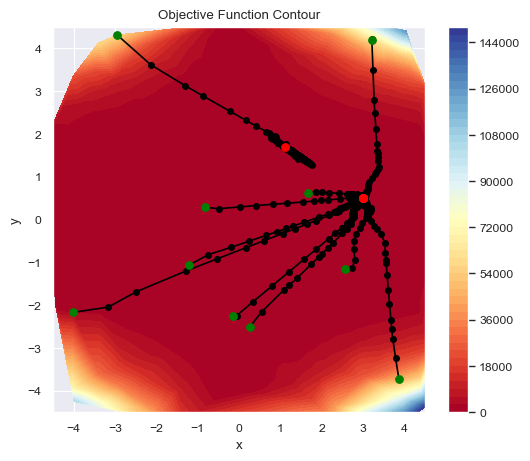

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[2.376901  0.5149177]], Gs: 0.7016142449929701
>> Final Values
swarm_ras | G: [[3.0000002  0.50000006]], Gs: 9.103826525526768e-15
beaof | G, Gs: ((3, 0.5, 0),)


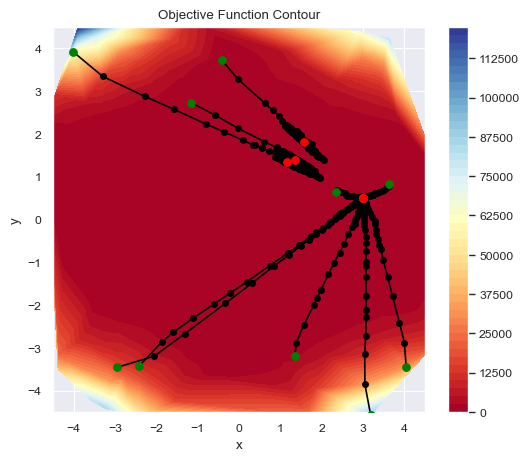

In [6]:
beaof = ohb.BealeObjective()

ss2d_beaof = {
    "x": ("con", beaof.bounds_2d[: 2]),
    "y": ("con", beaof.bounds_2d[2:]),	
}

print("True loss Contour")
beaof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_beaof,
        n_particles=200,
        objective_function=beaof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"beaof | G, Gs: {beaof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Bukin N.6 Objective

True loss Contour


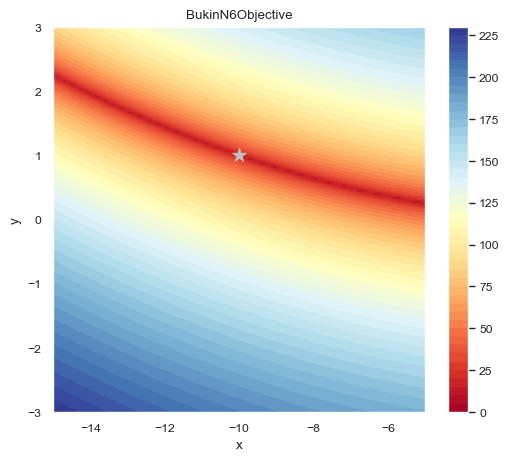

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-14.969583    2.2401216]], Gs: 2.8108848798717294
>> Final Values
swarm_ras | G: [[-11.684703    1.3653228]], Gs: 0.018810662081206967
bucof | G, Gs: ((-10, 1, 0),)


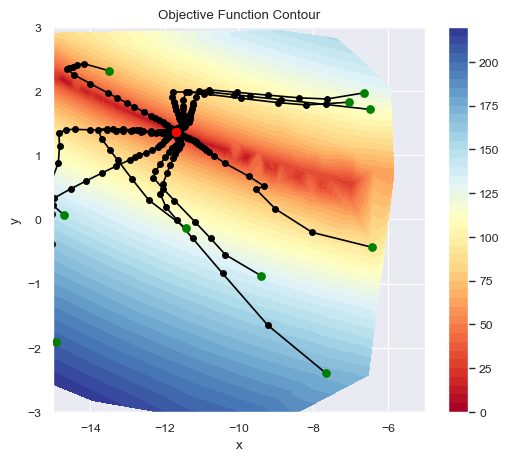

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[-13.103187    1.7214603]], Gs: 6.758103839838907
>> Final Values
swarm_ras | G: [[-10.57537     1.1183847]], Gs: 0.006487746422534797
bucof | G, Gs: ((-10, 1, 0),)


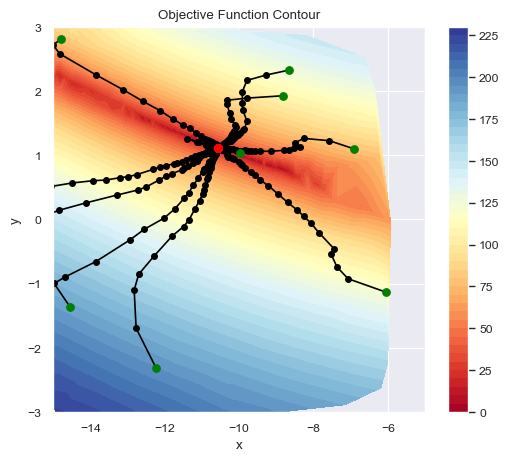

In [7]:
bucof = ohb.BukinN6Objective()

ss2d_bucof = {
    "x": ("con", bucof.bounds_2d[: 2]),
    "y": ("con", bucof.bounds_2d[2:]),	
}

print("True loss Contour")
bucof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_bucof,
        n_particles=200,
        objective_function=bucof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"bucof | G, Gs: {bucof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

It can be seen here that the swarm using false gradients could penetrate through the contour perpendicularly, while the swarm without false gradients could not. The latter's particles have to travel along the contour for a long time before overcoming it due to global best attraction.
Moreover, the swarm using false gradients could get much closer to the global minimum along the saddle crease, this is because the false gradients could help the particles to travel along the saddle crease, while the swarm without false gradients could not.

Levi N.13 Objective

True loss Contour


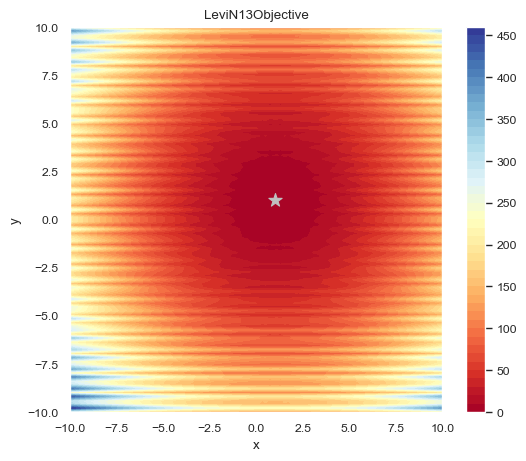

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-0.52182794 -0.9057737 ]], Gs: 9.431376510453804
>> Final Values
swarm_ras | G: [[1.0000025 0.9998603]], Gs: 2.0082758838957763e-08
levof | G, Gs: ((1, 1, 0),)


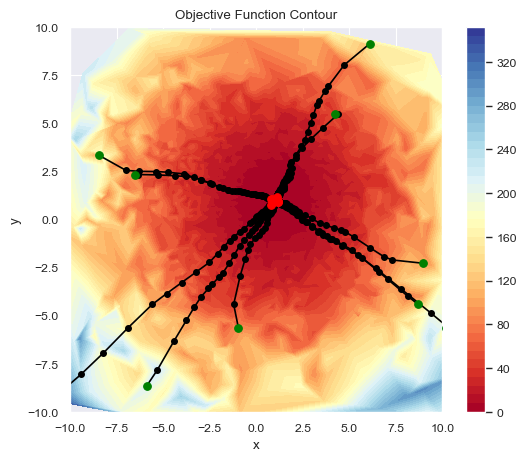

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[1.2505605 1.4935912]], Gs: 0.8640767815068712
>> Final Values
swarm_ras | G: [[1.        1.0000017]], Gs: 2.785327524485868e-12
levof | G, Gs: ((1, 1, 0),)


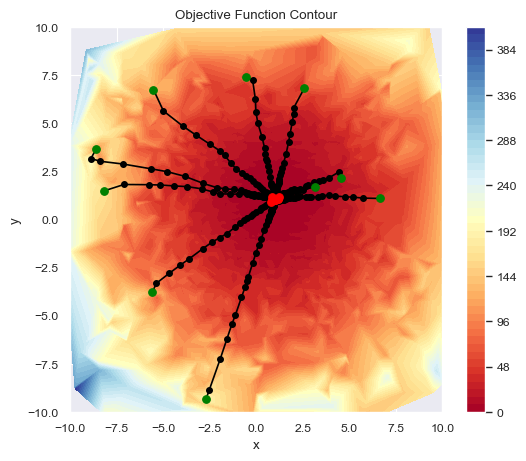

In [8]:
levof = ohb.LeviN13Objective()

ss2d_levof = {
    "x": ("con", levof.bounds_2d[: 2]),
    "y": ("con", levof.bounds_2d[2:]),	
}

print("True loss Contour")
levof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_levof,
        n_particles=200,
        objective_function=levof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"levof | G, Gs: {levof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Easom Objective

True loss Contour


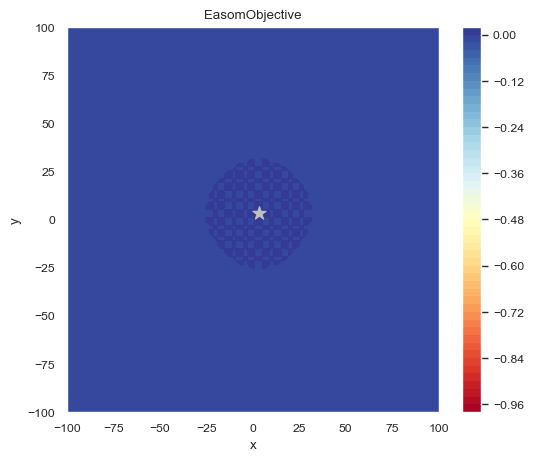

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[ 9.004738 -4.225993]], Gs: -1.3385782352281958e-39
>> Final Values
swarm_ras | G: [[3.141593  3.1415927]], Gs: -0.9999999999998294
easof | G, Gs: ((3.141592653589793, 3.141592653589793, -1),)


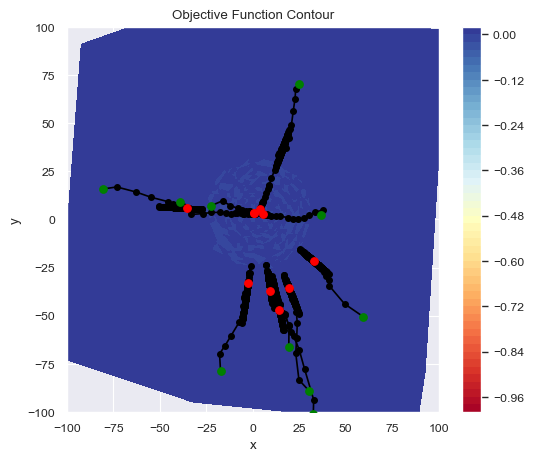

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[ 9.320199  -4.4903116]], Gs: -2.9199848292086e-43
>> Final Values
swarm_ras | G: [[3.141593  3.1415925]], Gs: -0.9999999999998065
easof | G, Gs: ((3.141592653589793, 3.141592653589793, -1),)


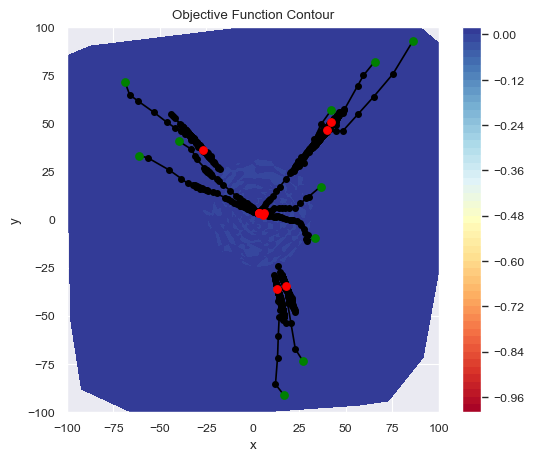

In [9]:
easof = ohb.EasomObjective()

ss2d_easof = {
    "x": ("con", easof.bounds_2d[: 2]),
    "y": ("con", easof.bounds_2d[2:]),	
}

print("True loss Contour")
easof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_easof,
        n_particles=200,
        objective_function=easof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"easof | G, Gs: {easof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Cross in Tray Objective

True loss Contour


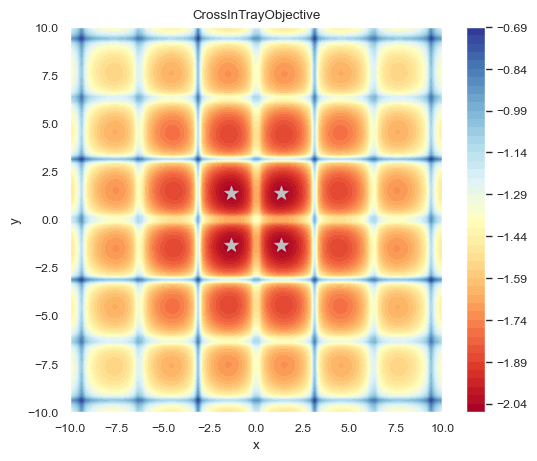

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-1.1178358 -1.1019573]], Gs: -2.049604972569057
>> Final Values
swarm_ras | G: [[-1.3494066 -1.3494065]], Gs: -2.0626118708227357
citof | G, Gs: ((1.34941, -1.34941, -2.06261), (1.34941, 1.34941, -2.06261), (-1.34941, 1.34941, -2.06261), (-1.34941, -1.34941, -2.06261))


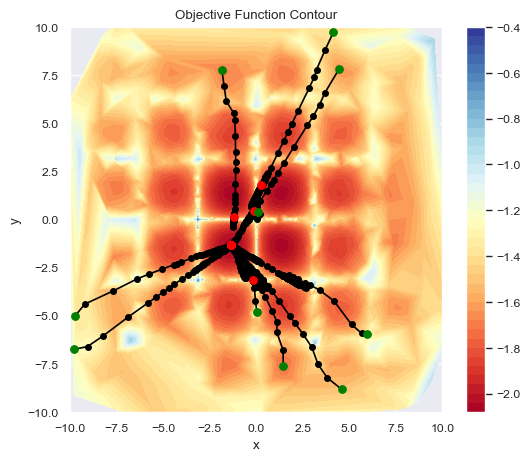

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[-1.1511915  1.6652703]], Gs: -2.045614289437388
>> Final Values
swarm_ras | G: [[-1.3494067  1.3494068]], Gs: -2.0626118708227303
citof | G, Gs: ((1.34941, -1.34941, -2.06261), (1.34941, 1.34941, -2.06261), (-1.34941, 1.34941, -2.06261), (-1.34941, -1.34941, -2.06261))


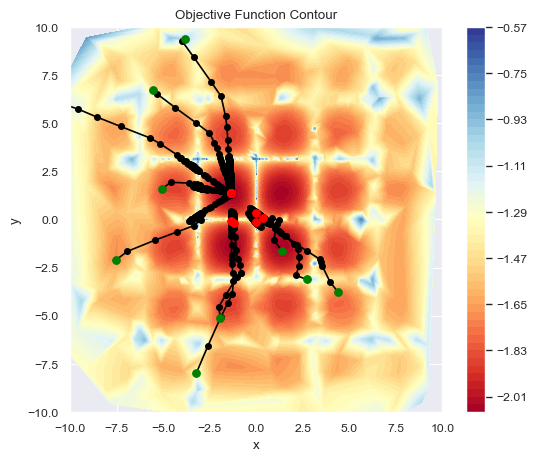

In [10]:
citof = ohb.CrossInTrayObjective()

ss2d_citof = {
    "x": ("con", citof.bounds_2d[: 2]),
    "y": ("con", citof.bounds_2d[2:]),	
}

print("True loss Contour")
citof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_citof,
        n_particles=200,
        objective_function=citof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"citof | G, Gs: {citof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Egg Holder Objective

True loss Contour


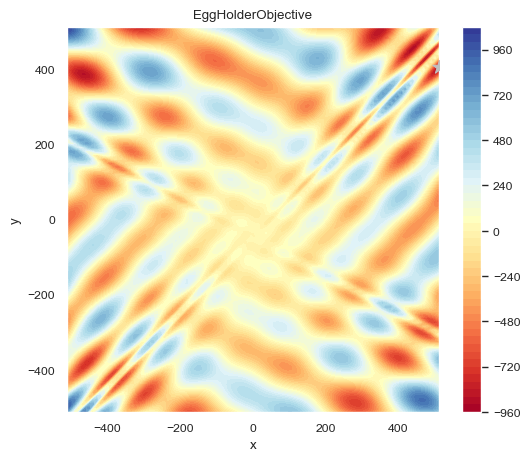

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[367.61932 508.0081 ]], Gs: -824.2011169474174
>> Final Values
swarm_ras | G: [[439.48096 453.97742]], Gs: -935.3379515600029
eggof | G, Gs: ((512, 404.2319, -959.6407),)


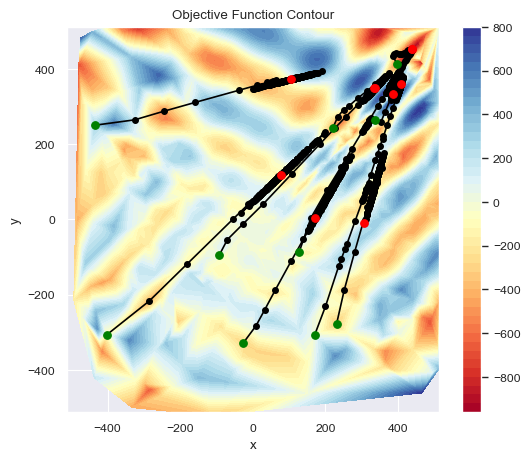

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[439.70682 449.8775 ]], Gs: -916.7053352630589
>> Final Values
swarm_ras | G: [[437.6403  452.21603]], Gs: -934.7096175423376
eggof | G, Gs: ((512, 404.2319, -959.6407),)


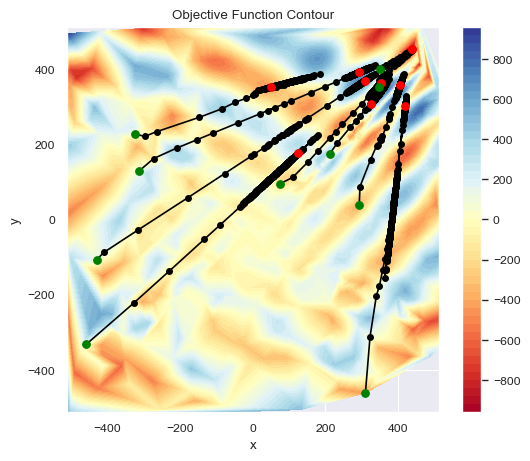

In [12]:
eggof = ohb.EggHolderObjective()

ss2d_eggof = {
    "x": ("con", eggof.bounds_2d[: 2]),
    "y": ("con", eggof.bounds_2d[2:]),	
}

print("True loss Contour")
eggof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_eggof,
        n_particles=200,
        objective_function=eggof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"eggof | G, Gs: {eggof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Holder Table Objective

True loss Contour


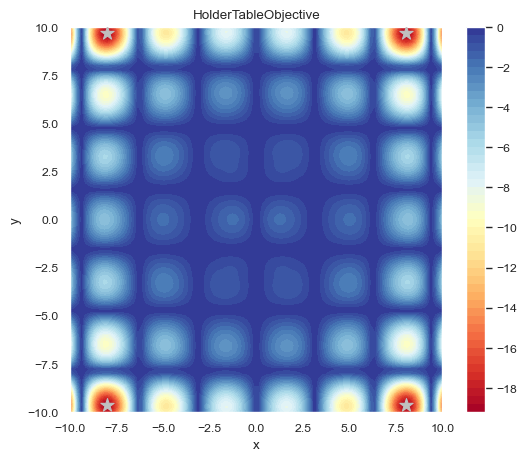

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-8.012119 -9.661125]], Gs: -19.190306819916422
>> Final Values
swarm_ras | G: [[-8.022695 -9.641996]], Gs: -19.192946903693965
hotof | G, Gs: ((8.05502, 9.66459, -19.2085), (-8.05502, 9.66459, -19.2085), (8.05502, -9.66459, -19.2085), (-8.05502, -9.66459, -19.2085))


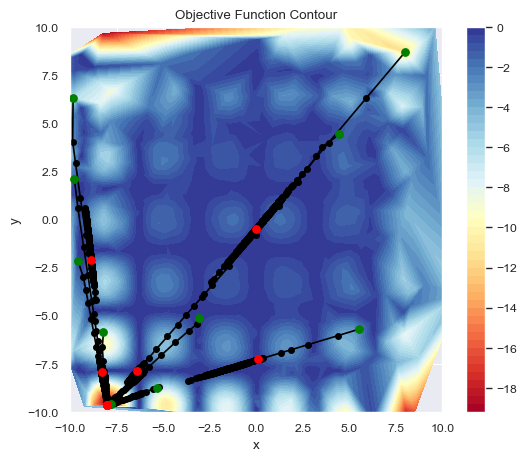

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[-8.266541 -9.184572]], Gs: -16.71904189442053
>> Final Values
swarm_ras | G: [[ 8.055022 -9.664589]], Gs: -19.208502567859348
hotof | G, Gs: ((8.05502, 9.66459, -19.2085), (-8.05502, 9.66459, -19.2085), (8.05502, -9.66459, -19.2085), (-8.05502, -9.66459, -19.2085))


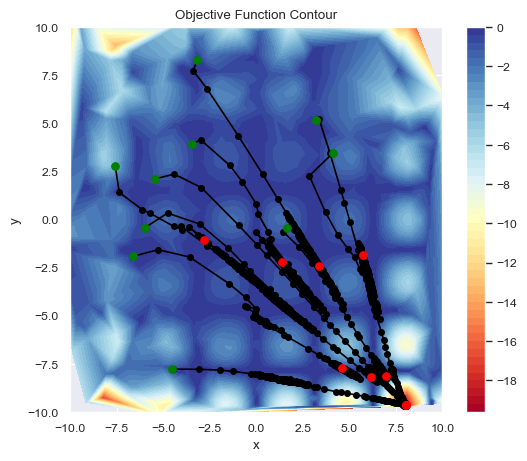

In [14]:
hotof = ohb.HolderTableObjective()

ss2d_hotof = {
    "x": ("con", hotof.bounds_2d[: 2]),
    "y": ("con", hotof.bounds_2d[2:]),	
}

print("True loss Contour")
hotof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_hotof,
        n_particles=200,
        objective_function=hotof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"hotof | G, Gs: {hotof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Schaffer N.4 Objective

True loss Contour


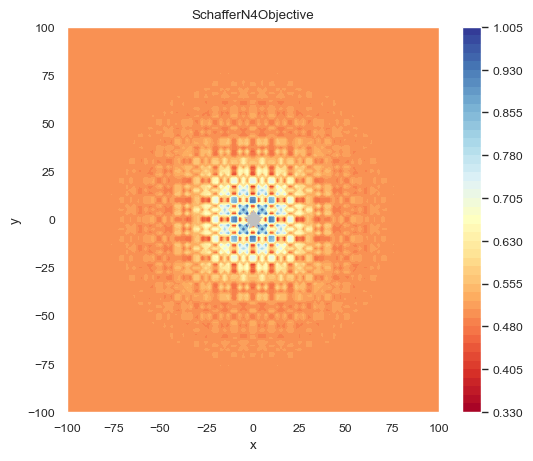

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-7.0667644  1.1311492]], Gs: 0.31221343883741026
>> Final Values
swarm_ras | G: [[-1.2531317e+00 -1.3728175e-05]], Gs: 0.29257863203615686
sch4of | G, Gs: ((0, 1.25313, 0.292579), (0, -1.25313, 0.292579), (1.25313, 0, 0.292579), (-1.25313, 0, 0.292579))


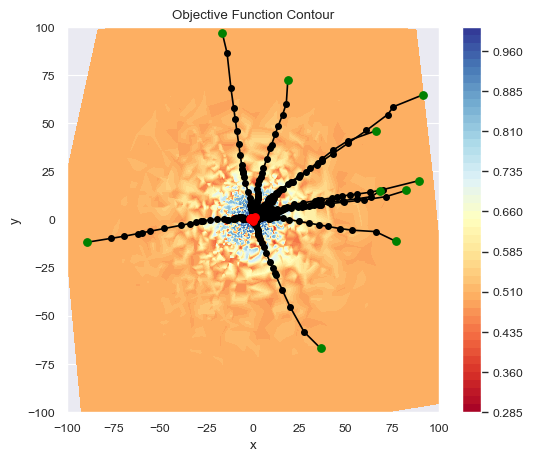

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[ -0.13370395 -20.779604  ]], Gs: 0.4069752881349528
>> Final Values
swarm_ras | G: [[1.2530888  0.01855142]], Gs: 0.29257897846749104
sch4of | G, Gs: ((0, 1.25313, 0.292579), (0, -1.25313, 0.292579), (1.25313, 0, 0.292579), (-1.25313, 0, 0.292579))


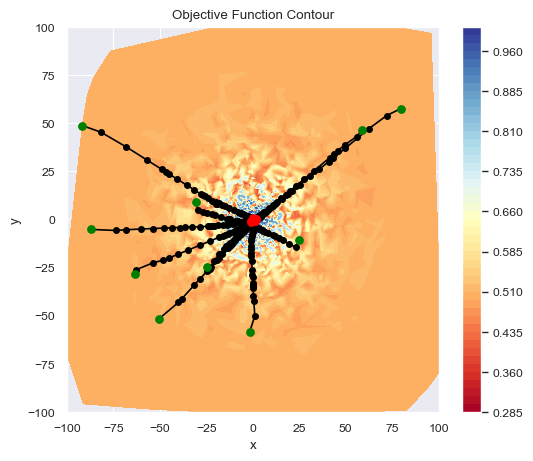

In [15]:
sch4of = ohb.SchafferN4Objective()

ss2d_sch4of = {
    "x": ("con", sch4of.bounds_2d[: 2]),
    "y": ("con", sch4of.bounds_2d[2:]),	
}

print("True loss Contour")
sch4of.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_sch4of,
        n_particles=200,
        objective_function=sch4of,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"sch4of | G, Gs: {sch4of.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )

Styblinski-Tang Objective

True loss Contour


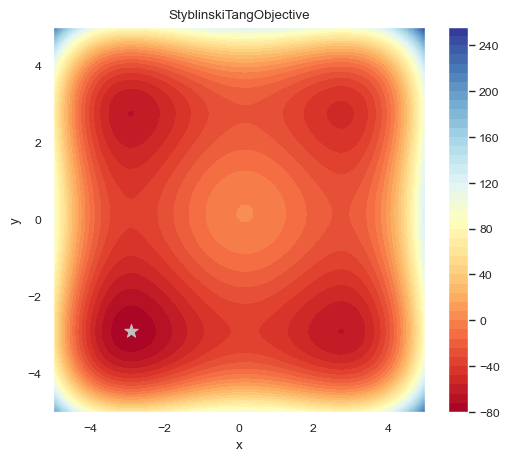

>>> Use Gradient:  False
>> Initial Values
swarm_ras | G: [[-2.6834102 -2.5666218]], Gs: -75.80812050951704
>> Final Values
swarm_ras | G: [[-2.9035337 -2.9035342]], Gs: -78.33233140754056
sttof | G, Gs: ((-2.903534, -2.903534, -78.33233),)


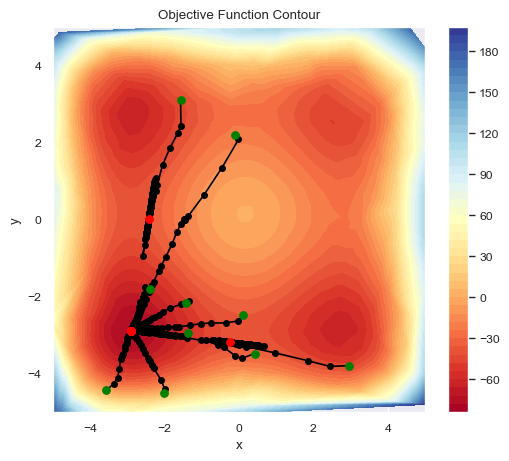

>>> Use Gradient:  True
>> Initial Values
swarm_ras | G: [[-3.2699194 -2.766646 ]], Gs: -75.40723345161345
>> Final Values
swarm_ras | G: [[-2.9035342 -2.9035337]], Gs: -78.33233140754056
sttof | G, Gs: ((-2.903534, -2.903534, -78.33233),)


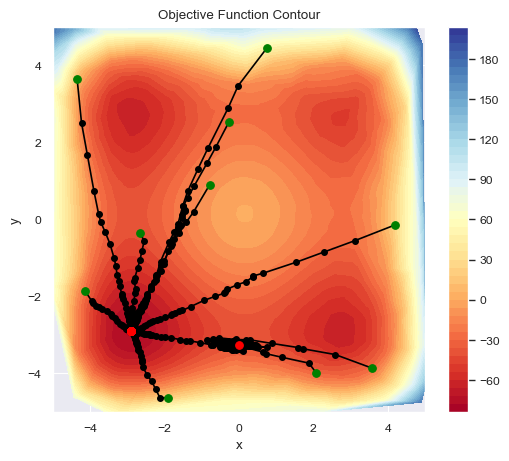

In [18]:
sttof = ohb.StyblinskiTangObjective()

ss2d_sttof = {
    "x": ("con", sttof.bounds_2d[: 2]),
    "y": ("con", sttof.bounds_2d[2:]),	
}

print("True loss Contour")
sttof.plot2d()
for use_grad in [False, True]:
    sot_ras = ohp.SwarmObjectiveTracker(
        track_params=["x", "y"],
        eager=False,
        lazy_step=2,
    )
    swarm_ras = ohp.VanillaSwarm(
        search_space=ss2d_sttof,
        n_particles=200,
        objective_function=sttof,
        cc=0.3,
        sc=0.3,
        r1=0.3,
        r2=0.3,
        use_gradient=use_grad,
        gw=0.1,
        n_perturb=2,
        r3=0.1,
        trackers=[sot_ras],
    )

    print(">>> Use Gradient: ", use_grad)
    print(">> Initial Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")

    swarm_ras.run(500)

    print(">> Final Values")
    print(f"swarm_ras | G: {swarm_ras.G}, Gs: {swarm_ras.Gs}")
    print(f"sttof | G, Gs: {sttof.global_minima_2d}")
    sot_ras.draw_lazy(
        particle_indices=[p for p in range(0, swarm_ras.n_particles, 20)],
    )